In [1]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = quandl.get('FSE/ADS_X',start_date="2017-01-01", end_date="2018-01-02", authoken='paPQhtsw_4qE95W_pUaa')
df.rename(columns={'Traded Volume':'Volume'}, inplace=True)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [3]:
print(df)

              Open    High     Low   Close     Volume
Date                                                 
2017-01-02  149.75  151.95  149.35  151.30   445138.0
2017-01-03  150.90  151.05  148.80  149.25   641172.0
2017-01-04  149.40  149.40  146.35  146.40   618563.0
2017-01-05  145.25  145.80  143.50  144.30   739147.0
2017-01-06  143.80  145.05  142.95  144.80   641054.0
2017-01-09  145.10  145.40  144.15  144.50   583147.0
2017-01-10  145.25  146.10  144.45  144.80   460627.0
2017-01-11  144.75  146.25  144.70  145.55   412401.0
2017-01-12  144.80  146.50  144.30  146.00   534037.0
2017-01-13  146.45  147.95  145.35  147.95   487101.0
2017-01-16  146.85  148.90  146.85  148.30   351401.0
2017-01-17  147.65  147.80  145.85  147.35   433069.0
2017-01-18  147.30  151.80  147.30  151.70   680676.0
2017-01-19  151.75  152.85  150.60  152.30   621644.0
2017-01-20  151.25  152.90  149.85  152.20   755126.0
2017-01-23  151.40  153.50  151.25  152.50   474302.0
2017-01-24  153.15  155.20  

In [4]:
df['PCT_Change']= (df['Close'] - df['Open']) / (df['High']) * 100
df['HL_PCT'] = (df['High'] - df['Close']) / (df['Close']) * 100

In [5]:
print(df)

              Open    High     Low   Close     Volume  PCT_Change    HL_PCT
Date                                                                       
2017-01-02  149.75  151.95  149.35  151.30   445138.0    1.020072  0.429610
2017-01-03  150.90  151.05  148.80  149.25   641172.0   -1.092354  1.206030
2017-01-04  149.40  149.40  146.35  146.40   618563.0   -2.008032  2.049180
2017-01-05  145.25  145.80  143.50  144.30   739147.0   -0.651578  1.039501
2017-01-06  143.80  145.05  142.95  144.80   641054.0    0.689417  0.172652
2017-01-09  145.10  145.40  144.15  144.50   583147.0   -0.412655  0.622837
2017-01-10  145.25  146.10  144.45  144.80   460627.0   -0.308008  0.897790
2017-01-11  144.75  146.25  144.70  145.55   412401.0    0.547009  0.480934
2017-01-12  144.80  146.50  144.30  146.00   534037.0    0.819113  0.342466
2017-01-13  146.45  147.95  145.35  147.95   487101.0    1.013856  0.000000
2017-01-16  146.85  148.90  146.85  148.30   351401.0    0.973808  0.404585
2017-01-17  

In [12]:
forecast_col = ['Close']
df.fillna(-99999, inplace=True)

In [27]:
forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

In [28]:
print(df)

              Open    High     Low   Close     Volume  PCT_Change    HL_PCT  \
Date                                                                          
2017-01-02  149.75  151.95  149.35  151.30   445138.0    1.020072  0.429610   
2017-01-03  150.90  151.05  148.80  149.25   641172.0   -1.092354  1.206030   
2017-01-04  149.40  149.40  146.35  146.40   618563.0   -2.008032  2.049180   
2017-01-05  145.25  145.80  143.50  144.30   739147.0   -0.651578  1.039501   
2017-01-06  143.80  145.05  142.95  144.80   641054.0    0.689417  0.172652   
2017-01-09  145.10  145.40  144.15  144.50   583147.0   -0.412655  0.622837   
2017-01-10  145.25  146.10  144.45  144.80   460627.0   -0.308008  0.897790   
2017-01-11  144.75  146.25  144.70  145.55   412401.0    0.547009  0.480934   
2017-01-12  144.80  146.50  144.30  146.00   534037.0    0.819113  0.342466   
2017-01-13  146.45  147.95  145.35  147.95   487101.0    1.013856  0.000000   
2017-01-16  146.85  148.90  146.85  148.30   351401.

In [29]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]

In [39]:
df.dropna(inplace = True)
y = np.array(df['label'])


In [31]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.1)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test, y_test)

In [32]:
forecast_set = clf.predict(X_lately)

In [33]:
print(forecast_set, accuracy, forecast_out)

[186.4770144  185.11080793 185.49248393] 0.8871816763059596 3


In [34]:
df['Forecast'] = np.nan

In [35]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

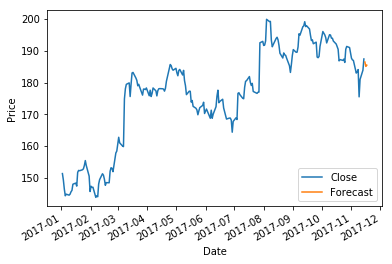

In [36]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()